This notebook contains a classifier between new_whale (class identified as 0) and other (class identified as 1)

In [1]:
from fastai.conv_learner import *
from fastai.dataset import *
from tqdm import tqdm 
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt
import math

In [2]:
# Set paths to dataset
TRAIN = "../original_data/train"
TEST = "../original_data/test"
LABELS = "../original_data/train.csv"
SAMPLE_SUB = "../original_data/sample_submission.csv"

In [3]:
arch = resnet50
nw = 4

In [35]:
# prepare the dataset to work with Fastai pipeline
train_df = pd.read_csv(LABELS).set_index('Image')
#print(train_df)

In [29]:
unique_labels = np.unique(train_df.Id.values)
unique_labels

array(['new_whale', 'w_0003639', 'w_0003c59', ..., 'w_ffa6d42', 'w_ffcf5fe', 'w_ffe8693'], dtype=object)

In [30]:
labels_dict = dict()
labels_list = []
# assign new_whale class 0
labels_dict[unique_labels[0]] = 0
labels_list.append(0)
labels_list.append(1)
for i in range(1, len(unique_labels)):
    labels_dict[unique_labels[i]] = 1
    #labels_list.append(unique_labels[i])
#print("Labels dict: {}".format(labels_dict))
#print("Labels list: {}".format(labels_list))
#print("Number of classes: {}".format(len(unique_labels)))


In [36]:
# convert from w_a1o23whatever into our own index
train_names = train_df.index.values
#train_names
#train_df
x = train_df.Id.apply(lambda x: labels_dict[x])
x

Image
0000e88ab.jpg    1
0001f9222.jpg    1
00029d126.jpg    1
00050a15a.jpg    0
0005c1ef8.jpg    0
0006e997e.jpg    0
000a6daec.jpg    1
000f0f2bf.jpg    0
0016b897a.jpg    1
001c1ac5f.jpg    1
001cae55b.jpg    1
001d7450c.jpg    0
00200e115.jpg    0
00245a598.jpg    0
002b4615d.jpg    0
002f99f01.jpg    0
00355ff28.jpg    1
00357e37a.jpg    1
003795857.jpg    0
0041880bf.jpg    0
0043da555.jpg    0
00442c882.jpg    1
00464ff65.jpg    0
004775679.jpg    1
004ae9e26.jpg    0
004c0f43b.jpg    0
004e8ad5b.jpg    1
004f87702.jpg    1
0050ef29d.jpg    1
00514c876.jpg    1
                ..
ff9c31f7d.jpg    1
ff9ca801d.jpg    0
ffa18f942.jpg    0
ffa3d0d2e.jpg    1
ffa5fa27e.jpg    1
ffa695dbf.jpg    1
ffa9fc95d.jpg    1
ffaba39d4.jpg    1
ffad54783.jpg    1
ffad62503.jpg    0
ffb9d76d2.jpg    0
ffbead2bd.jpg    0
ffc0dd0dc.jpg    1
ffc7686c5.jpg    0
ffc946e11.jpg    0
ffca5cb22.jpg    1
ffcd5efdc.jpg    1
ffd0f1e95.jpg    0
ffd19b7d0.jpg    0
ffd2144c5.jpg    0
ffd61cded.jpg    0
ffd7a6

In [37]:
train_df.Id = train_df.Id.apply(lambda x: labels_dict[x])
print(train_df)
train_labels = np.asarray(train_df.Id.values)
print("Train_labels: {}".format(train_labels))
test_names = [f for f in os.listdir(TEST)]

               Id
Image            
0000e88ab.jpg   1
0001f9222.jpg   1
00029d126.jpg   1
00050a15a.jpg   0
0005c1ef8.jpg   0
0006e997e.jpg   0
000a6daec.jpg   1
000f0f2bf.jpg   0
0016b897a.jpg   1
001c1ac5f.jpg   1
001cae55b.jpg   1
001d7450c.jpg   0
00200e115.jpg   0
00245a598.jpg   0
002b4615d.jpg   0
002f99f01.jpg   0
00355ff28.jpg   1
00357e37a.jpg   1
003795857.jpg   0
0041880bf.jpg   0
0043da555.jpg   0
00442c882.jpg   1
00464ff65.jpg   0
004775679.jpg   1
004ae9e26.jpg   0
004c0f43b.jpg   0
004e8ad5b.jpg   1
004f87702.jpg   1
0050ef29d.jpg   1
00514c876.jpg   1
...            ..
ff9c31f7d.jpg   1
ff9ca801d.jpg   0
ffa18f942.jpg   0
ffa3d0d2e.jpg   1
ffa5fa27e.jpg   1
ffa695dbf.jpg   1
ffa9fc95d.jpg   1
ffaba39d4.jpg   1
ffad54783.jpg   1
ffad62503.jpg   0
ffb9d76d2.jpg   0
ffbead2bd.jpg   0
ffc0dd0dc.jpg   1
ffc7686c5.jpg   0
ffc946e11.jpg   0
ffca5cb22.jpg   1
ffcd5efdc.jpg   1
ffd0f1e95.jpg   0
ffd19b7d0.jpg   0
ffd2144c5.jpg   0
ffd61cded.jpg   0
ffd7a6f5a.jpg   1
ffdddcc0f.

1    15697
0     9664
Name: Id, dtype: int64


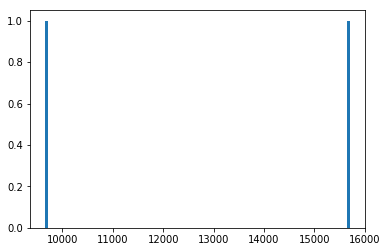

In [40]:
# plot a histogram of sample-per-class distribution
labels_count = train_df.Id.value_counts()
print(labels_count)
_, _, _ = plt.hist(labels_count, bins=100)
#labels_count

Count for class new_whale / 0 : 15697


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,
         3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,
         7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25,
        10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75,
        14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 , 15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25,
        17.5 , 17.75, 18.  , 18.25, 

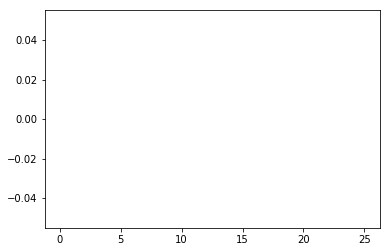

In [42]:
# we can see that the histogram does not show anything good because of new_whale many examples
print("Count for class new_whale / 0 : {}".format(labels_count[0]))

plt.hist(labels_count[1:], bins = 100, range=[0, 25])

In [43]:
print(train_names)

['0000e88ab.jpg' '0001f9222.jpg' '00029d126.jpg' ... 'fff9002e0.jpg' 'fffcde6fe.jpg' 'fffde072b.jpg']


In [17]:
# we need to duplicate examples because there are many classes with just one example
dup = []
for idx, row in train_df.iterrows():
    if labels_count[row['Id']] < 5:
        dup.extend([idx]*math.ceil((5 - labels_count[row['Id']])/labels_count[row['Id']]))
train_names = np.concatenate([train_names, dup])
#print(len(train_names))
train_names = train_names[np.random.RandomState(seed=50).permutation(train_names.shape[0])]
print(len(train_names))

41589


In [44]:
# Split training data into train and validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1,random_state=42069)
for train_idx, val_idx in sss.split(train_names, np.zeros(train_names.shape)):
    tr_n, val_n = train_names[train_idx], train_names[val_idx]
print(len(tr_n), len(val_n))

22824 2537


In [45]:
# Let's see the dimensions (height, width) of images
avg_width = 0
avg_height = 0
for fn in os.listdir(TRAIN)[:1000]:
    img = cv2.imread(os.path.join(TRAIN,fn))
    avg_width += img.shape[1]
    avg_height += img.shape[0]

avg_width //= 1000
avg_height //= 1000
print(avg_width, avg_height)

1011 522


In [46]:
class HWIDataset(FilesDataset):
    def __init__(self, fnames, path, transform):
        self.train_df = train_df
        super().__init__(fnames, transform, path)
        
    def get_x(self, i):
        img = open_image(os.path.join(self.path, self.fnames[i]))
        img = cv2.resize(img, (self.sz, self.sz))
        return img
    
    def get_y(self, i):
        if(self.path == TEST): return 0
        return self.train_df.loc[self.fnames[i]]['Id']
    
    def get_c(self):
        return len(unique_labels)

In [47]:
class RandomLightning(Transform):
    def __init__(self, b, c, tfm_y=TfmType.NO):
        super().__init__(tfm_y)
        self.b, self.c = b, c
        
    def set_state(self):
        self.store.b_rand = rand0(self.b)
        self.store.c_rand = rand0(self.c)
        
    def do_transform(self, x, is_y):
        if is_y and self.tfm_y != TfmType.PIXEL: return x
        b = self.store.b_rand
        c = self.store.c_rand
        c = -1 / (c-1) if c < 0 else c + 1
        x = lighting(x, b, c)
        return x
    
def get_data(sz, bs):
    aug_tfms = [RandomRotateZoom(deg=20, zoom=2, stretch=1),
                RandomLighting(0.05, 0.05, tfm_y=TfmType.NO),
                RandomBlur(blur_strengths=3, tfm_y=TfmType.NO),
                RandomFlip(tfm_y=TfmType.NO)]
    tfms = tfms_from_model(arch, sz, crop_type=CropType.NO, tfm_y=TfmType.NO, aug_tfms=aug_tfms)
    ds = ImageData.get_ds(HWIDataset, (tr_n[:-(len(tr_n) % bs)], TRAIN), (val_n, TRAIN), tfms, test=(test_names, TEST))
    md = ImageData("./", ds, bs, num_workers=nw, classes=None)
    return md

In [48]:
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
#os.environ["CUDA_VISIBLE_DEVICES"]="2"
#torch.cuda.set_device(1)
batch_size = 64
md = get_data(avg_width//4, batch_size)
learn = ConvLearner.pretrained(arch, md)
learn.opt_fn = optim.Adam

 79%|███████▊  | 280/356 [01:57<00:27,  2.72it/s, loss=5.99]

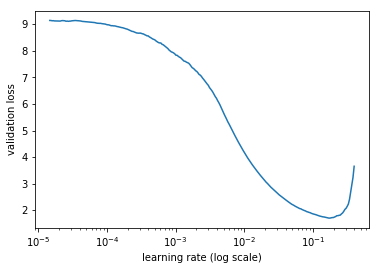

In [49]:
learn.lr_find()
learn.sched.plot()

In [50]:
lr = 1e-2
#torch.cuda.set_device(0)

In [52]:
learn.fit(lr, 1, cycle_len=2)
learn.unfreeze()
lrs = np.array([lr/10, lr/20, lr/40])
learn.fit(lrs, 4, cycle_len=4, use_clr=(20, 16))
learn.fit(lrs/4, 2, cycle_len=4, use_clr=(10, 16))
learn.fit(lrs/16, 1, cycle_len=4, use_clr=(10, 16))

epoch      trn_loss   val_loss   accuracy                    
    0      0.591114   0.580064   0.705558  
    1      0.574403   0.565897   0.710288                    


epoch      trn_loss   val_loss   accuracy                    
    0      0.607738   0.590997   0.691368  
    1      0.563817   0.570133   0.705164                    
    2      0.54633    0.549326   0.734726                    
    3      0.529251   0.524392   0.747339                    
    4      0.559631   0.665835   0.638155                    
    5      0.543536   0.546695   0.738274                    
    6      0.525912   0.534805   0.748128                    
    7      0.508335   0.515665   0.759559                    
    8      0.548886   0.545106   0.734726                    
    9      0.530972   0.533094   0.734726                    
    10     0.511274   0.528419   0.748916                    
    11     0.490485   0.518673   0.758376                    
    12     0.546747   0.562632   0.716989                    
    13     0.525087   0.523749   0.75877                     
    14     0.503086   0.528408   0.754829                    
    15     0.491699   0.50

epoch      trn_loss   val_loss   accuracy                    
    0      0.488671   0.511499   0.757588  
    1      0.460285   0.503236   0.763894                    
    2      0.462078   0.512186   0.764289                    
    3      0.450303   0.508686   0.760741                    
    4      0.471489   0.507556   0.764683                    
    5      0.457316   0.505369   0.767442                    
    6      0.454396   0.513403   0.757194                    
    7      0.436316   0.518766   0.765471                    


epoch      trn_loss   val_loss   accuracy                    
    0      0.427129   0.515873   0.766654  
    1      0.425054   0.515056   0.759164                    
    2      0.423978   0.519521   0.766654                    
    3      0.403741   0.513243   0.767048                    


[array([0.51324]), 0.7670476936570386]

In [53]:
preds_t,y_t = learn.TTA(is_test=True,n_aug=8)
preds_t = np.stack(preds_t, axis=-1)
preds_t = np.exp(preds_t)
preds_t = preds_t.mean(axis=-1)
np.save("preds_resnet50_2classes.npy",preds_t)

In [27]:
MODEL_PATH = 'Resnet50_v1'
sample_df = pd.read_csv(SAMPLE_SUB)
sample_list = list(sample_df.Image)
pred_list = [[labels_list[i] for i in p.argsort()[-5:][::-1]] for p in preds_t]
pred_dic = dict((key, value) for (key, value) in zip(learn.data.test_ds.fnames,pred_list))
pred_list_cor = [' '.join(pred_dic[id]) for id in sample_list]
df = pd.DataFrame({'Image':sample_list,'Id': pred_list_cor})
df.to_csv('submission.csv'.format(MODEL_PATH), header=True, index=False)
df.head()

,Image,Id
0,00028a005.jpg,new_whale w_36bbd71 w_d72771c w_e6264df w_c875e45
1,000dcf7d8.jpg,new_whale w_6e7763b w_e3956f5 w_f7cd240 w_d907b6c
2,000e7c7df.jpg,new_whale w_c4862bb w_4689352 w_a743e09 w_15951db
3,0019c34f4.jpg,w_9c506f6 w_59052ad w_08630fd w_8b86b95 w_0135f5f
4,001a4d292.jpg,w_8c56684 w_3d67c3b w_9e18daa w_1fc4625 w_58ddf90


In [18]:
len(df)

7960

In [54]:
# Save the model
learn.save("resnet50_2classes")

In [25]:
# Load the model
learn.load("resnet50_2classes")

In [68]:
sample_df = pd.read_csv(SAMPLE_SUB)
#print(sample_df)
sample_list = list(sample_df["Image"])
#print(sample_list)
pred_list = [[labels_list[i] for i in p.argsort()[-5:][::-1]] for p in preds_t]
pred_dic = dict((key, value) for (key, value) in zip(learn.data.test_ds.fnames,pred_list))
print(pred_dic)

IndexError: list index out of range

In [64]:
labels_list

[0, 1]

In [67]:
np.argsort()[-5:][::-1]

TypeError: argsort() missing 1 required positional argument: 'a'